# Using the `antarctic_plots.regions` module

## Display all the pre=defined regions

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from antarctic_plots import maps, regions, fetch, maps, utils
from statistics import mean

Add all region strings to dictionary

In [2]:
def exclude(k):
    return k.startswith(
        (
            "__",
            "pd",
            "vd",
            "utils",
            "TYPE_CHECKING",
            "Union",
            "combine_regions",
            "maps",
            "ipyleaflet",
            "ipywidgets",
            "_has_ipyleaflet",
            "draw_region",
        )
    )


region_dict = {k: v for k, v in vars(regions).items() if not exclude(k)}
region_dict

{'antarctica': [-2800000.0, 2800000.0, -2800000.0, 2800000.0],
 'west_antarctica': [-2740000.0, 570000.0, -2150000.0, 1670000.0],
 'east_antarctica': [-840000.0, 2880000.0, -2400000.0, 2600000.0],
 'antarctic_peninsula': [-2600000.0, -1200000.0, 170000.0, 1800000.0],
 'marie_byrd_land': [-1500000.0, -500000.0, -1350000.0, -800000.0],
 'victoria_land': [100000.0, 1000000.0, -2200000.0, -1000000.0],
 'roosevelt_island': [-480000.0, -240000.0, -1220000.0, -980000.0],
 'ross_island': [210000.0, 360000.0, -1400000.0, -1250000.0],
 'minna_bluff': [210000.0, 390000.0, -1310000.0, -1120000.0],
 'mcmurdo_dry_valleys': [320000.0, 480000.0, -1400000.0, -1220000.0],
 'siple_coast': [-700000.0, 30000.0, -1110000.0, -450000.0],
 'crary_ice_rise': [-330000.0, -40000.0, -830000.0, -480000.0],
 'siple_dome': [-630000.0, -270000.0, -970000.0, -630000.0],
 'ross_ice_shelf': [-680000.0, 470000.0, -1420000.0, -310000.0],
 'larsen_ice_shelf': [-2430000.0, -1920000.0, 900000.0, 1400000.0],
 'ronne_filchner_i

Remove a few regions to help with plotting

In [9]:
%%capture
remove = ["antarctica", "west_antarctica", "east_antarctica"]
[region_dict.pop(key) for key in remove]

Plot the remaining regions

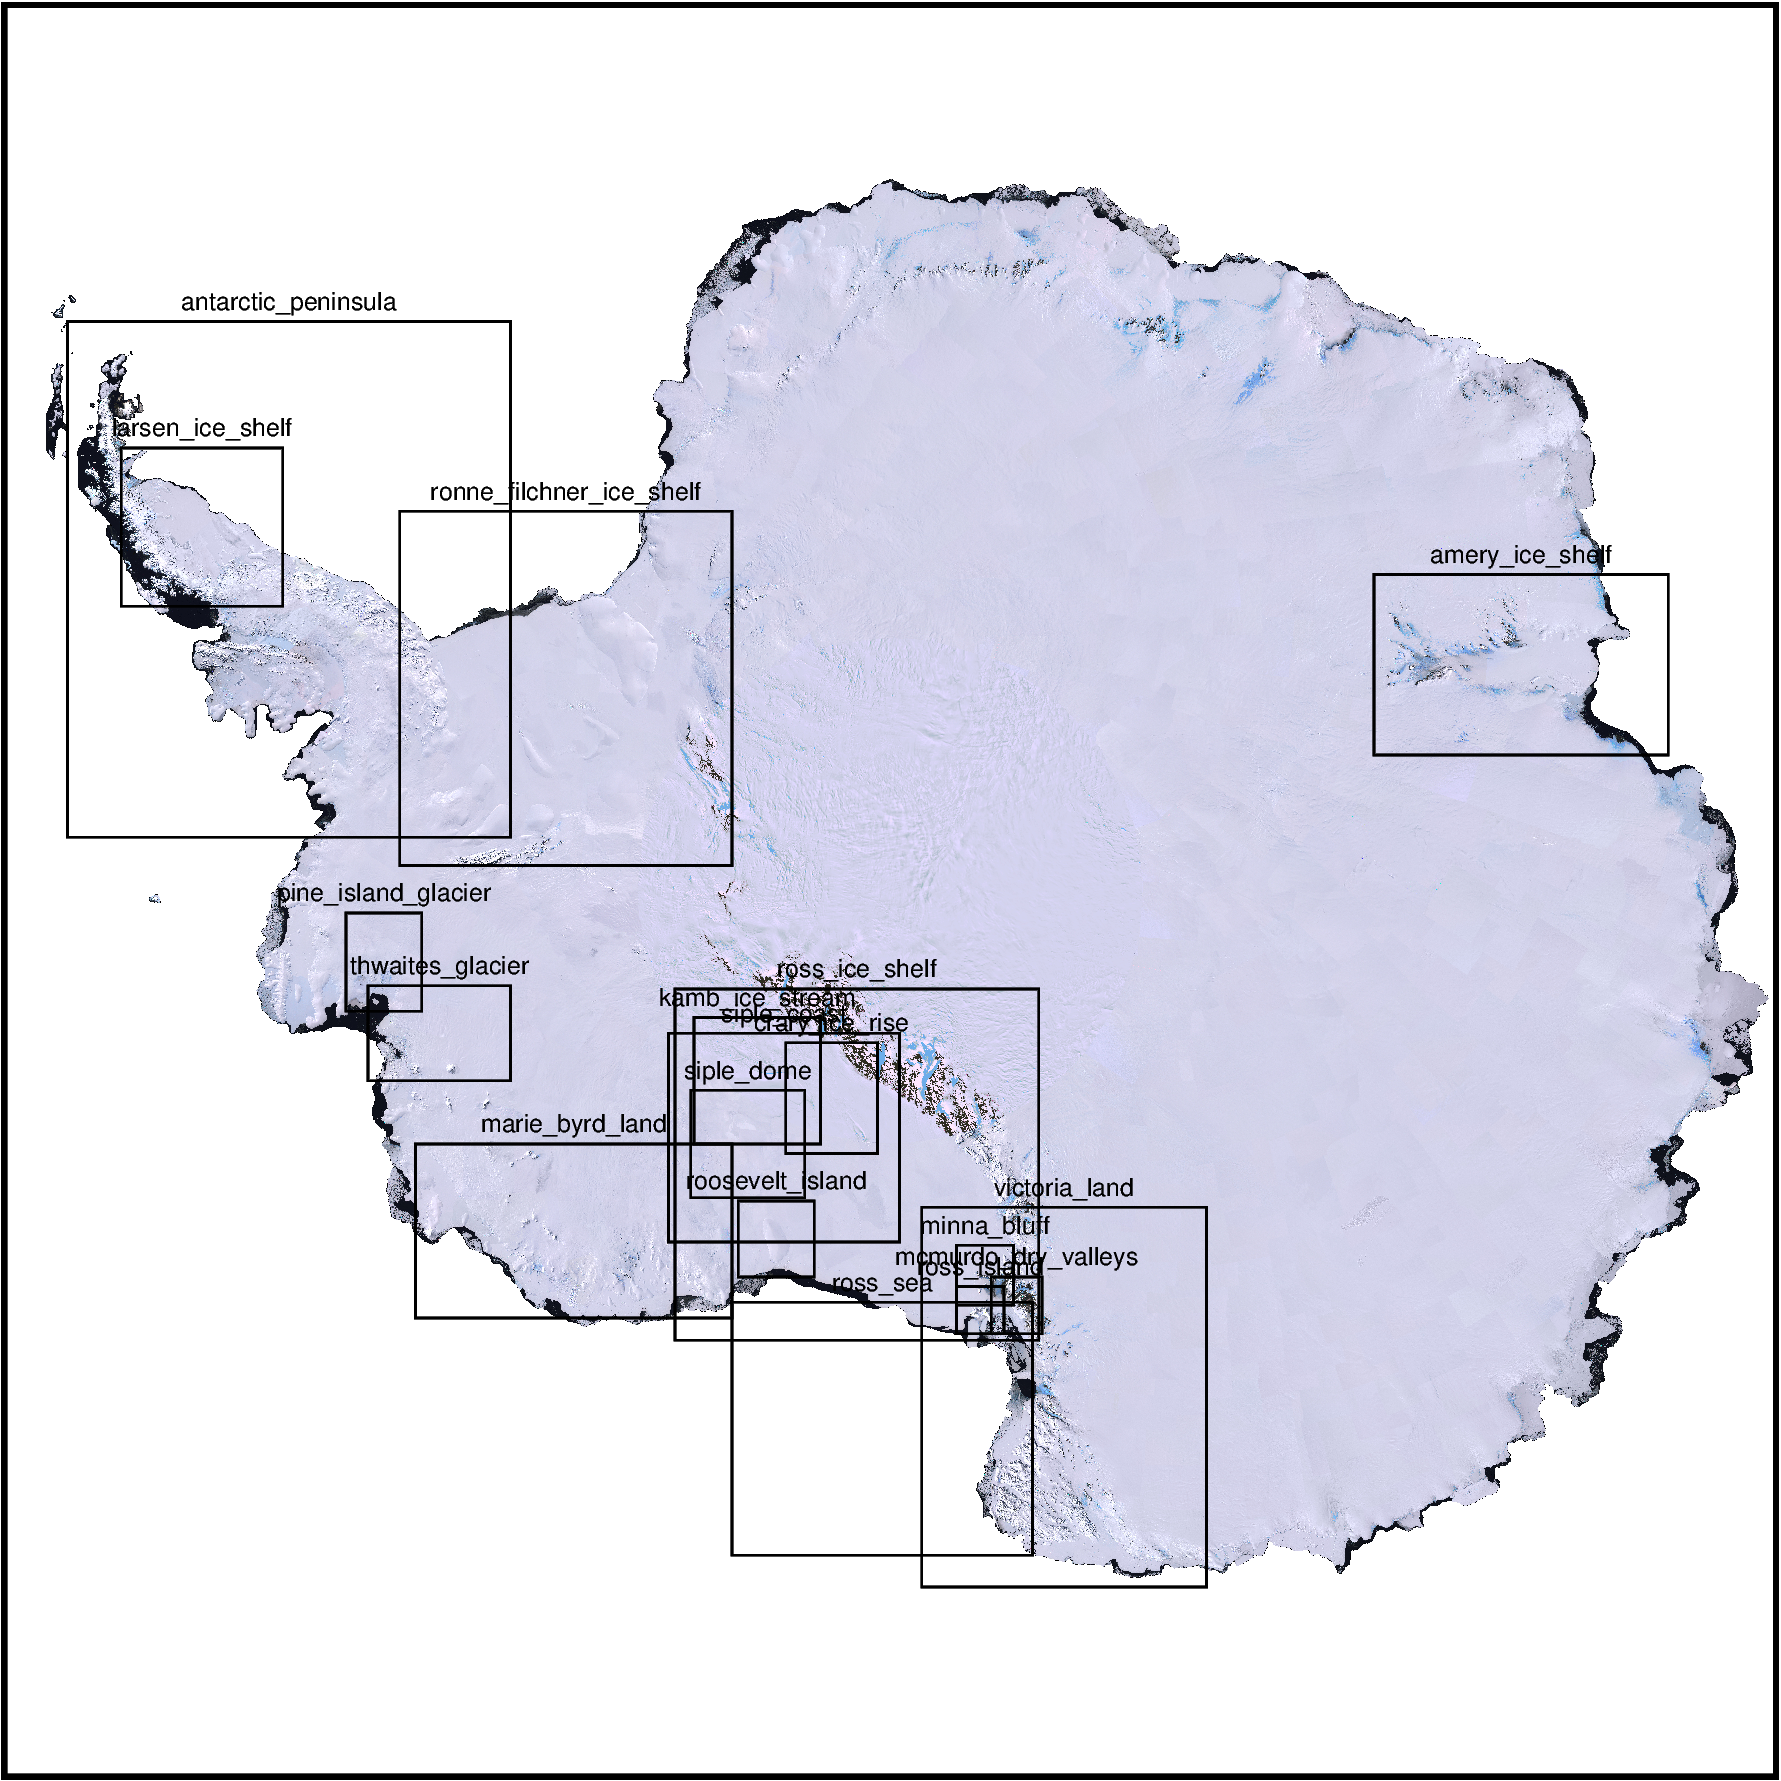

In [8]:
fig = maps.plot_grd(
    grid=fetch.imagery(),
    image=True,
    # grid=fetch.bedmap2(layer='surface'),
    # cmap='cool',
    plot_region=regions.antarctica,
)

for k, v in region_dict.items():
    maps.add_box(fig, v, pen=".6p,black")
    fig.text(
        x=mean([v[1], v[0]]),
        y=v[3],
        text=k,
        justify="CB",
        offset="0/.1",
        no_clip=True,
        font="6p,Helvetica,black",
    )

# save figure to use in the docs
fig.savefig("outputs/regions_plot.png")

fig.show()

## Combining regions

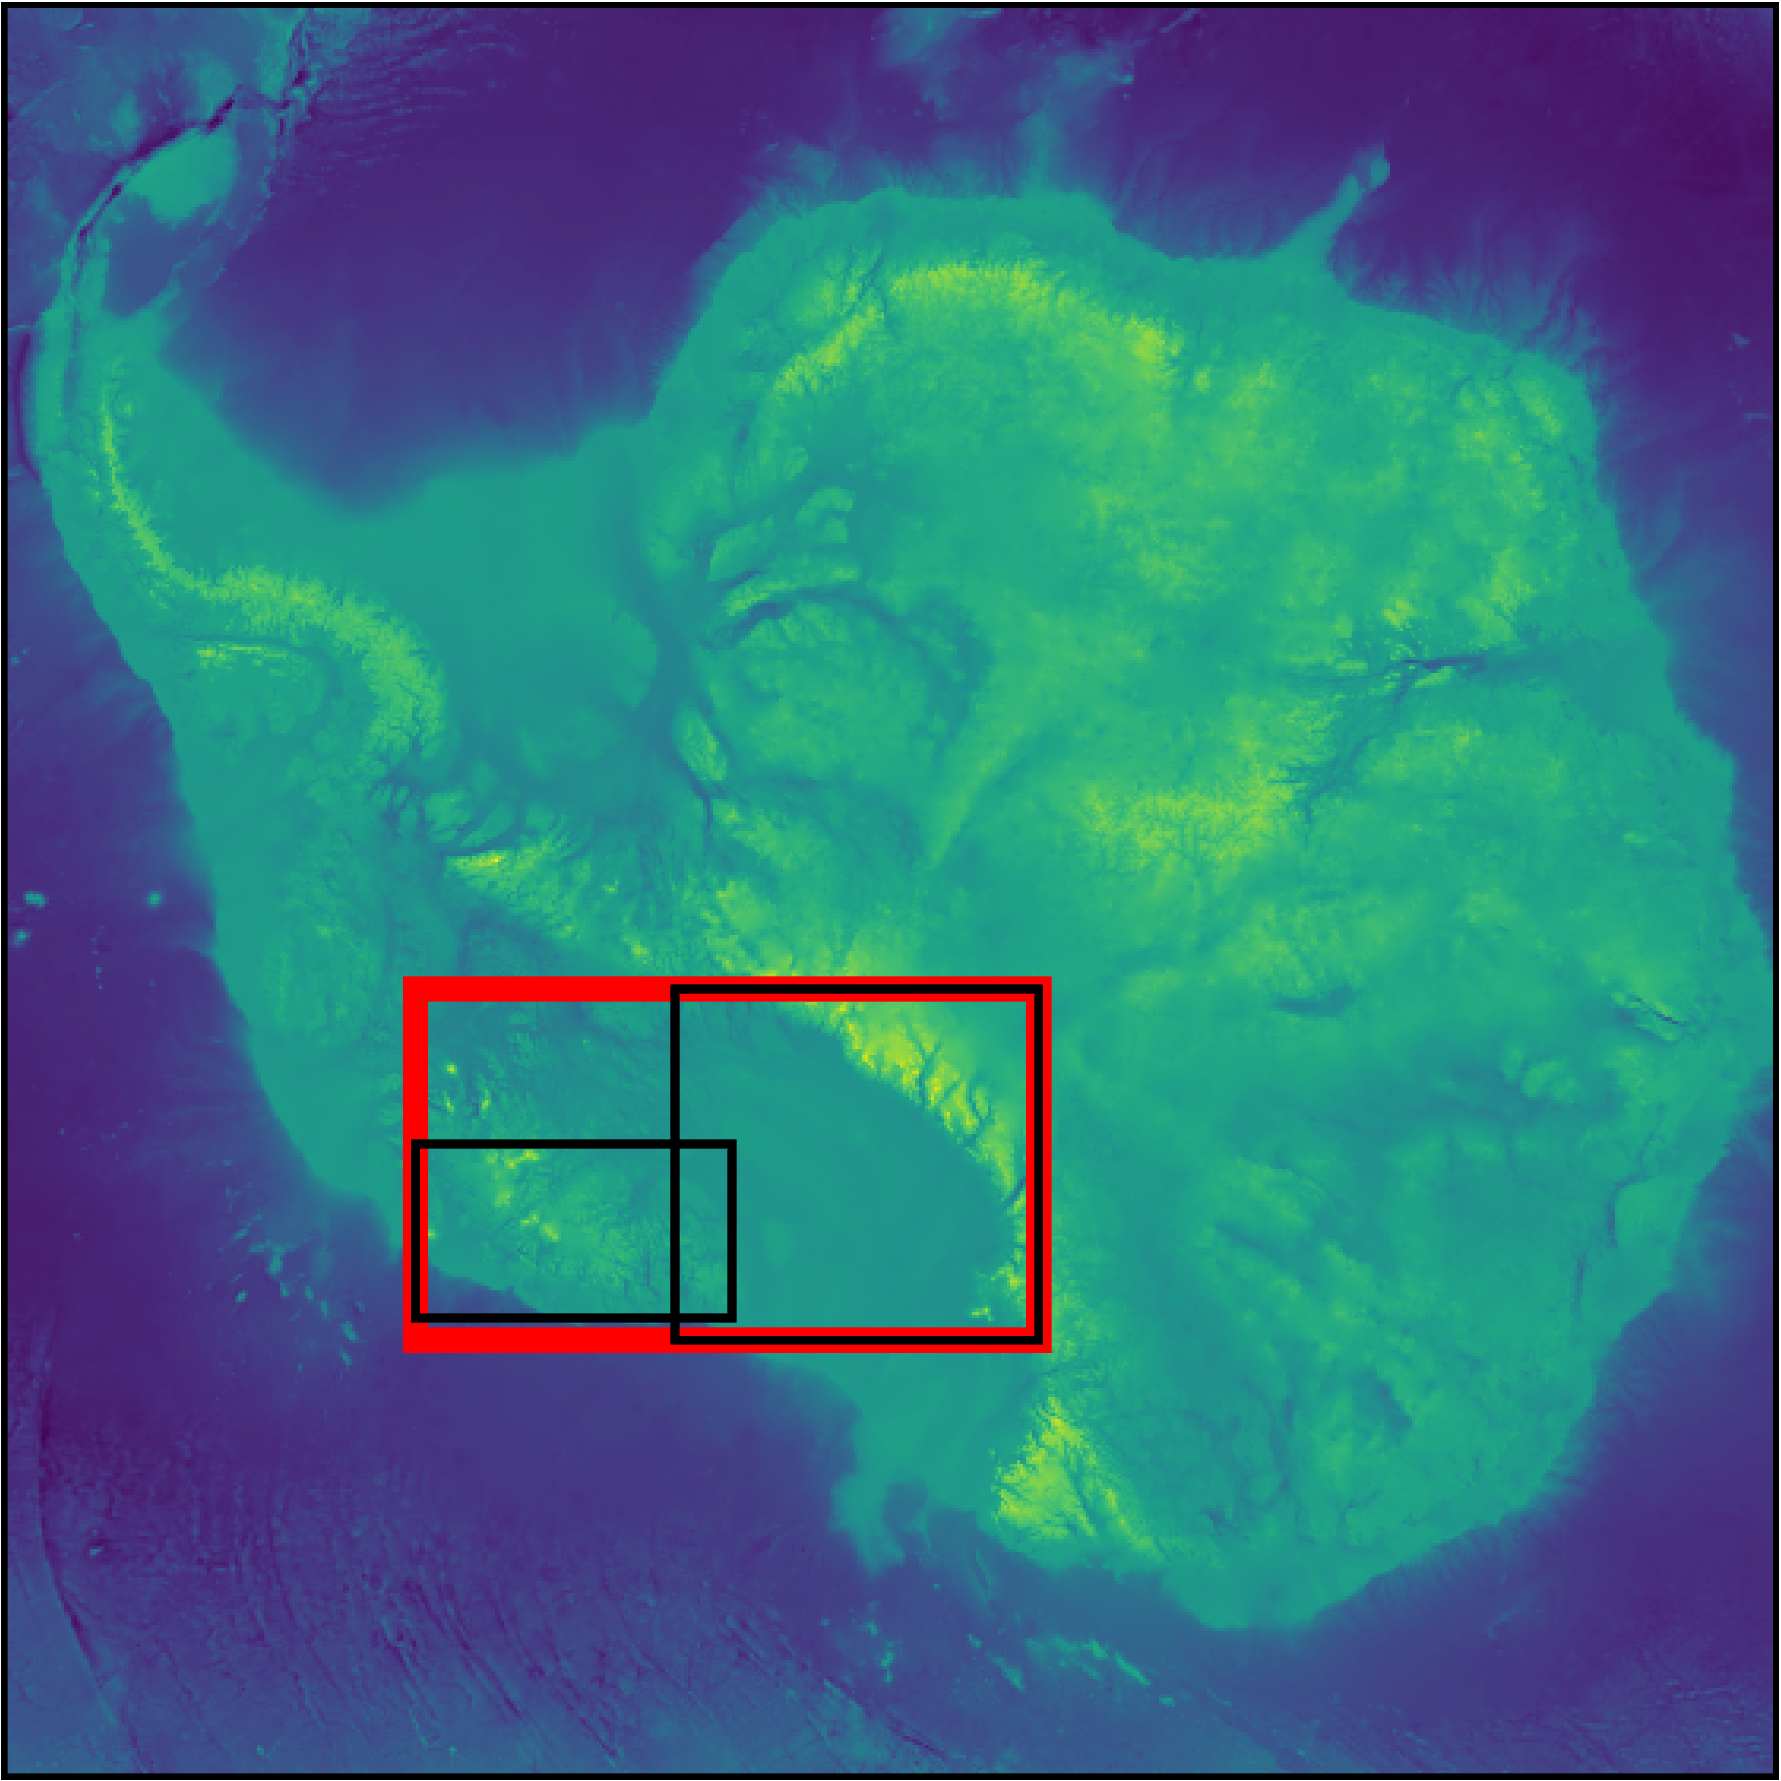

In [6]:
# define two regions
RIS = regions.ross_ice_shelf
MBL = regions.marie_byrd_land

# get the bounding region of both
combined = regions.combine_regions(RIS, MBL)

# make a basemap
fig = maps.plot_grd(
    fetch.bedmachine(layer="bed"), plot_region=regions.antarctica, colorbar=False
)
# plot the three regions
maps.add_box(fig, combined, pen="6p,red")
maps.add_box(fig, RIS)
maps.add_box(fig, MBL)

fig.show()

## Interactively choose a region
This use the package `ipyleaflet`, which isn't install automatically with `antarctic-plots`. Install it with `mamba install ipyleaflet`

The below cell will display an interactive map of Antarctica. Drag or zoom to your region of interest and use the `Draw a polygon` button to create a polygon outline the region you want.

In [3]:
polygon = regions.draw_region()

Label(value='')

Map(center=[-90.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [4]:
# get the bounding region of the polygon
region = utils.polygon_to_region(polygon)
region

(59391.9916647043, 201727.9776407338, -768000.0488495829, -468991.9529428775)

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_interactive\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


plot region is: [59300.0, 201950.0, -768050.0, -468800.0]


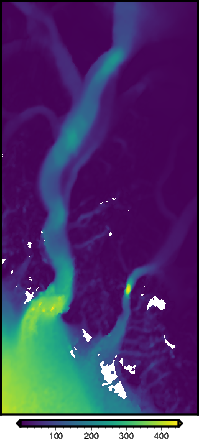

In [5]:
# use it to create a map
maps.plot_grd(
    fetch.ice_vel(spacing=450, region=region),
    region=region,
)